# **NETFLIX DATA ANALYSIS**




Step 1: Load the Data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/netflix_titles.csv')

# View the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 Step 2: Basic Exploration

In [2]:
# Get the shape and column info
df.shape, df.columns

# Check for null values
df.isnull().sum()

# Get data types and basic stats
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Step 3: Clean the Data

In [4]:
# Drop duplicates (if any)
df = df.drop_duplicates()

# Handle missing values
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['director'] = df['director'].fillna('Not Available')

# Fix date parsing issue
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')


Step 4: Visual Exploratory Analysis (using matplotlib/seaborn)

1: Content added per year

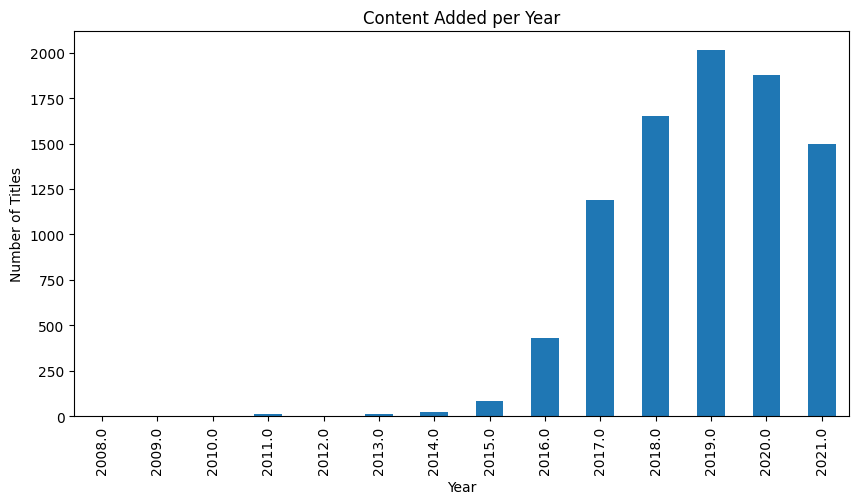

In [5]:
import matplotlib.pyplot as plt

df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


2: Count of Movies vs TV Shows

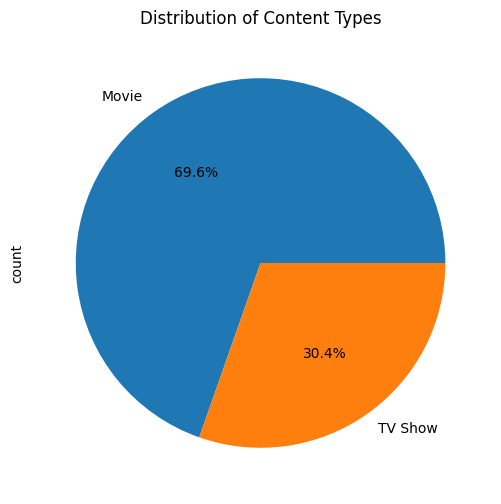

In [6]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribution of Content Types')
plt.show()


5: Country-wise Content

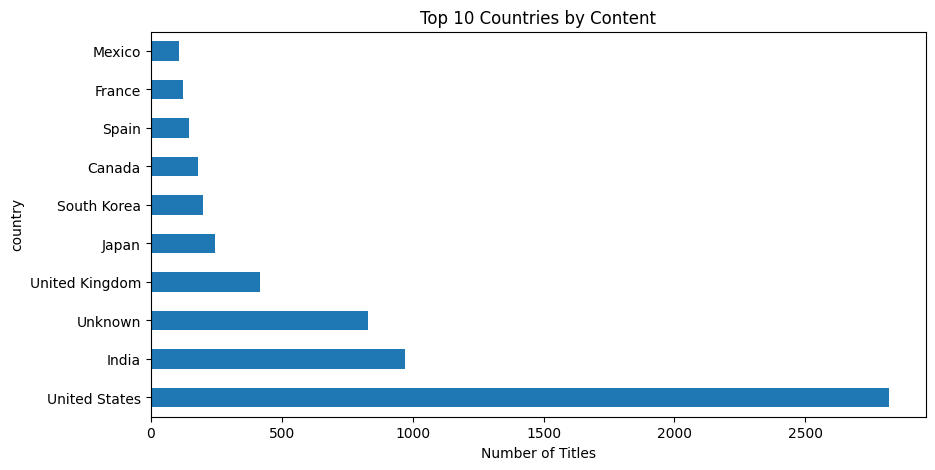

In [7]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', figsize=(10,5))
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.show()


Genre and Duration Insights

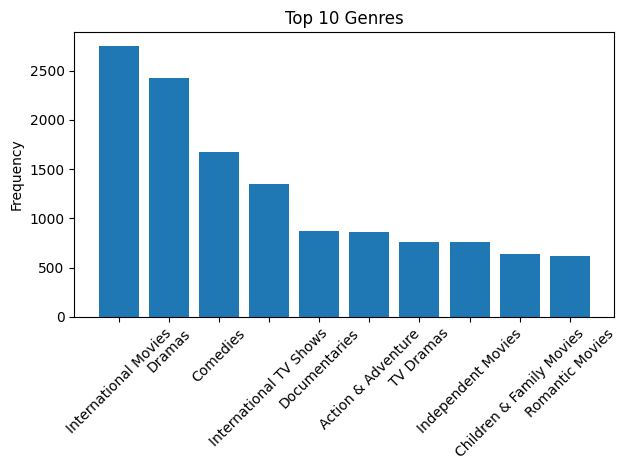

In [8]:
# Split genres
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in all_genres])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.bar(top_genres.keys(), top_genres.values())
plt.title('Top 10 Genres')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
